# Data Analysis
## Imports

In [10]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from itertools import chain # to unlist nested lists

In [2]:
games = pd.read_csv("nba_games_2024.csv")

## EDA

In [3]:
# Shape of dataframe
games.shape

(1464, 74)

/Users/Anaqi_Amir/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='home_total', ylabel='Count'>

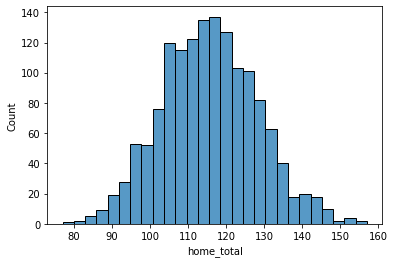

In [4]:
# Distribution of total points for home team
sns.histplot(data=games, x='home_total')

<AxesSubplot:xlabel='home_total', ylabel='away_total'>

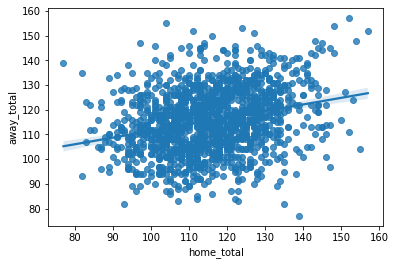

In [5]:
# Scatterplot of home and away points
sns.regplot(data=games, x='home_total',y='away_total')

/Users/Anaqi_Amir/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Anaqi_Amir/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Anaqi_Amir/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Anaqi_Amir/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

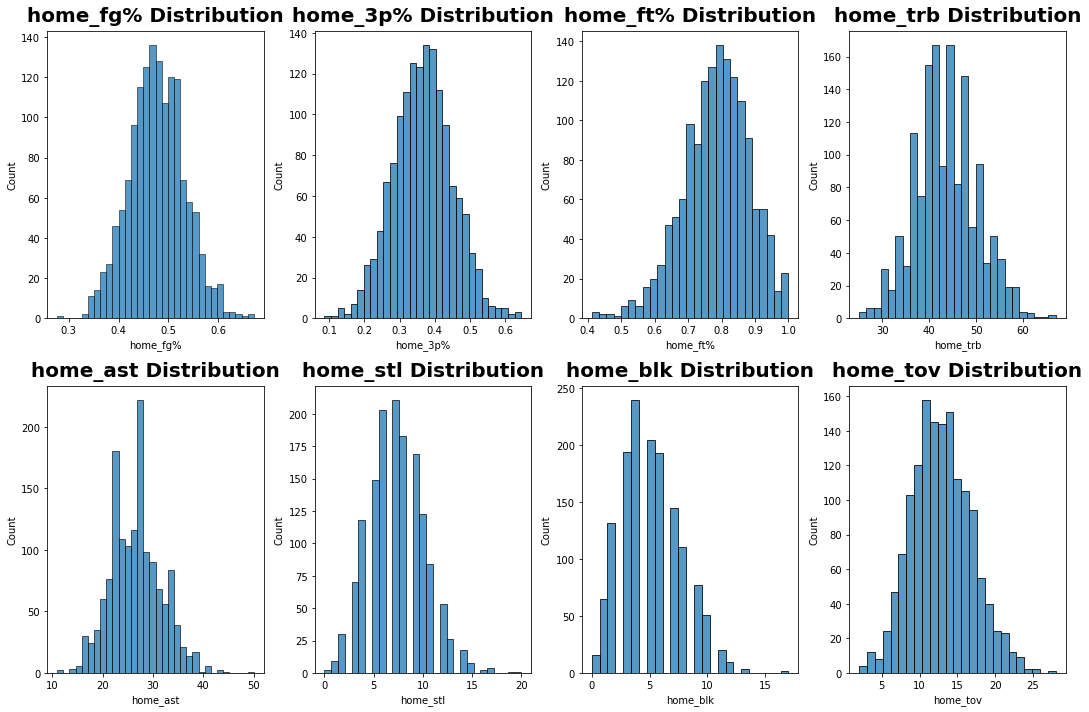

In [6]:
# Checking the distribution of basis games statistics
basic_stats = ['home_fg%','home_3p%','home_ft%','home_trb','home_ast','home_stl','home_blk','home_tov']

plt.figure(figsize=(15,10))
for index,column in enumerate(basic_stats):
    plt.subplot(2,4,index+1)
    sns.histplot(data=games, x=column)
    plt.title(f"{column} Distribution",fontweight="black",size=20,pad=10)
    plt.tight_layout()

## EDA by Teams

In [7]:
# Checking stats by team
stats_by_team = games.groupby('home_team')[basic_stats].mean().reset_index()
stats_by_team['home_won'] = games[games['home_won']==True].groupby('home_team')['home_won'].count().reset_index()['home_won']
for col in stats_by_team.columns:
    replacement = col.replace('home_','')
    stats_by_team.rename(columns={col: replacement},inplace=True)
stats_by_team

,team,fg%,3p%,ft%,trb,ast,stl,blk,tov,won
0,ATL,0.466980,0.360449,0.812041,45.040816,25.938776,7.816327,4.387755,12.857143,22
1,BOS,0.477429,0.380776,0.804490,47.326531,25.795918,6.326531,6.612245,11.959184,37
2,BRK,0.463458,0.367563,0.763021,45.333333,26.750000,6.854167,5.375000,11.895833,20
3,CHI,0.466140,0.355320,0.789900,43.320000,24.460000,7.800000,5.140000,11.820000,23
4,CHO,0.459383,0.359702,0.791255,40.936170,24.914894,6.574468,4.978723,13.085106,10
5,CLE,0.479106,0.358149,0.779660,45.063830,26.765957,7.765957,4.574468,12.957447,31
6,DAL,0.475122,0.369918,0.758102,41.408163,25.285714,6.571429,4.265306,12.061224,26
7,DEN,0.495240,0.368720,0.748960,44.120000,28.780000,6.740000,5.380000,11.620000,34
8,DET,0.474750,0.357250,0.777729,43.250000,26.395833,5.937500,4.979167,14.979167,6
9,GSW,0.473565,0.375043,0.796891,46.086957,28.456522,6.586957,3.956522,13.956522,21


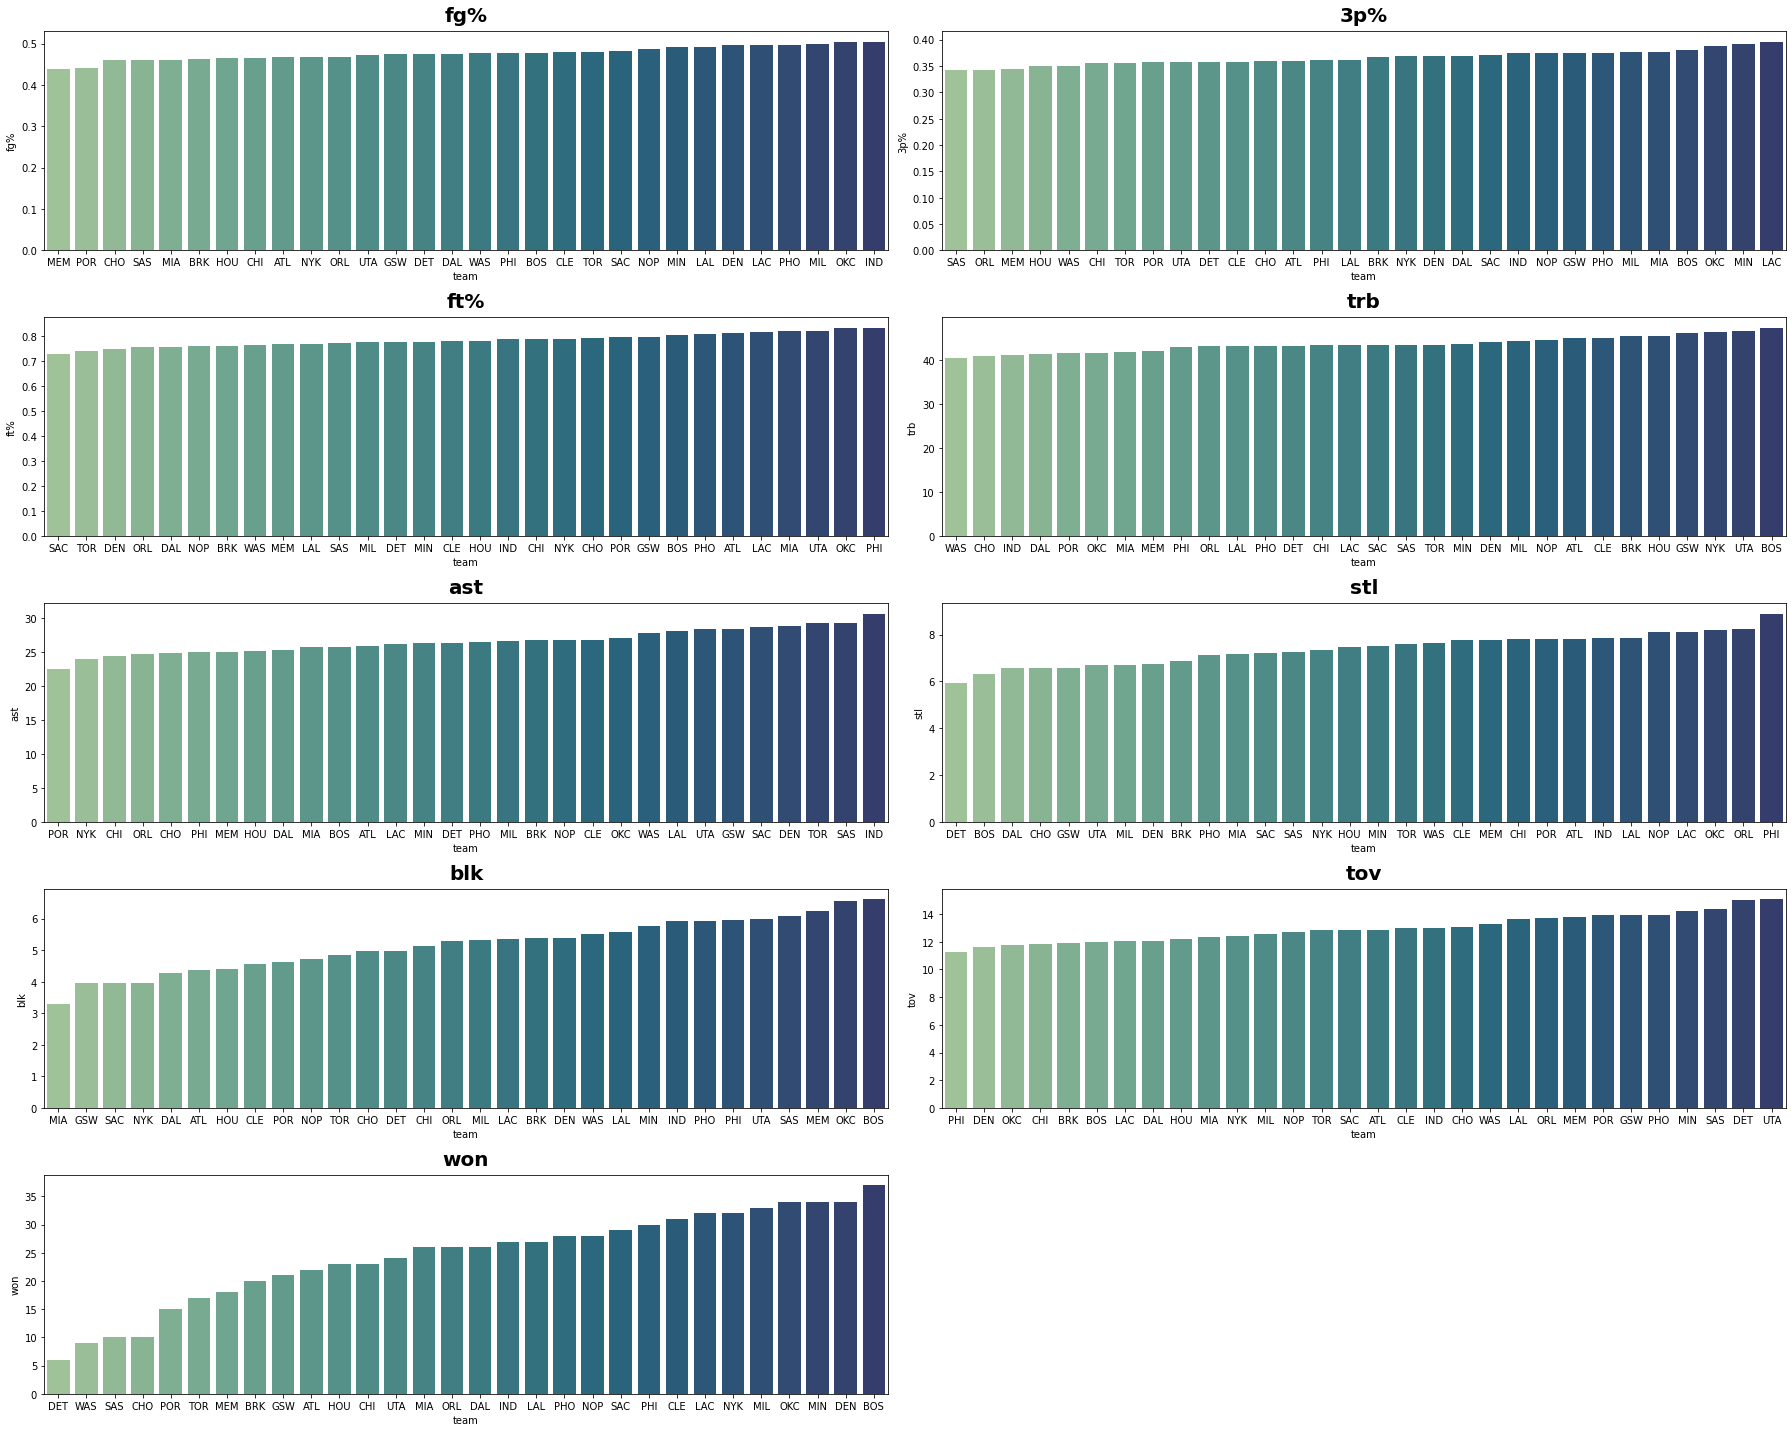

In [8]:
# Plotting leaders of each basic statistic
plt.figure(figsize=(25,20))
for index,column in enumerate(stats_by_team):
    if(index!=0): # index!=0 is not plotting the 'team' column
        plt.subplot(5,2,index)
        sns.barplot(stats_by_team,
                    x='team',
                    y=column,
                    order=stats_by_team.sort_values(column).team,
                    palette='crest')
        plt.title(f"{column}",fontweight="black",size=20,pad=10)
        plt.tight_layout()

In [11]:
################################################################################
### Creating dataframe that displays the top n teams in each basic statistic ###
################################################################################

# Setting top n teams
n = 5

# Initializing lists
stat_index = []
team_index = []
values = []

# Appending lists
for col in stats_by_team.columns[1:]:
    stat_index.append([col]*n)
    team_index.append(list(stats_by_team.nlargest(n,'3p%')['team']))
    values.append(list(stats_by_team.nlargest(n,'3p%')['3p%']))

# Unlisting nested lists
stat_index = list(chain.from_iterable(stat_index))
team_index = list(chain.from_iterable(team_index))
values = list(chain.from_iterable(values))

# Creating dataframe
top_teams = pd.DataFrame([stat_index,team_index,values]).T
top_teams.columns = ['Stat','Team','Average']
top_teams.set_index(['Stat','Team'],inplace=True)
top_teams

Average
Stat Team          
fg%  LAC   0.395915
     MIN   0.392633
     OKC    0.38851
     BOS   0.380776
     MIA   0.376837
3p%  LAC   0.395915
     MIN   0.392633
     OKC    0.38851
     BOS   0.380776
     MIA   0.376837
ft%  LAC   0.395915
     MIN   0.392633
     OKC    0.38851
     BOS   0.380776
     MIA   0.376837
trb  LAC   0.395915
     MIN   0.392633
     OKC    0.38851
     BOS   0.380776
     MIA   0.376837
ast  LAC   0.395915
     MIN   0.392633
     OKC    0.38851
     BOS   0.380776
     MIA   0.376837
stl  LAC   0.395915
     MIN   0.392633
     OKC    0.38851
     BOS   0.380776
     MIA   0.376837
blk  LAC   0.395915
     MIN   0.392633
     OKC    0.38851
     BOS   0.380776
     MIA   0.376837
tov  LAC   0.395915
     MIN   0.392633
     OKC    0.38851
     BOS   0.380776
     MIA   0.376837
won  LAC   0.395915
     MIN   0.392633
     OKC    0.38851
     BOS   0.380776
     MIA   0.376837

In [12]:
########################################################
### Custom Ranking of Teams based on all basic stats ###
########################################################

stats_by_team['overall'] = stats_by_team[['fg%','3p%','ft%','trb','ast','stl','blk','won']].sum(axis=1) - stats_by_team['tov']
team_overall = stats_by_team[['team','overall']].sort_values(by='overall',ascending=False).reset_index(drop=True)
team_overall.index += 1
team_overall

,team,overall
1,BOS,112.764735
2,DEN,109.012920
3,OKC,107.296531
4,MIL,105.100673
5,LAC,104.751681
6,MIN,104.600755
7,CLE,103.829681
8,PHI,103.193333
9,NYK,102.887320
10,IND,101.137431
